In [17]:
from sklearn.datasets import load_iris
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
%matplotlib inline

def getNewClusterForPoint(point,clusters): 
    listOfCLusters=[]
    for clt in clusters:
        listOfCLusters.append(clt.centroid)
    return clusters[spatial.KDTree(np.array(listOfCLusters)).query(point)[1]] 

def mykmeans(dataPoints,maxClusterNumbers,maxIter=100,kmtype="plane"):   
    random_seed = 10312003
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(len(dataPoints))
    dataPoints = dataPoints[permutation] 
    data = generateStartingCentroid(dataPoints,maxClusterNumbers,kmeansTypy=kmtype)
    centroids=data[0:maxClusterNumbers]
    clusters = [Cluster(point,[point]) for point in centroids] 
    returnCentroids=[]   
    for nIter in range(maxIter):
    #To exclude the three centroids that were randomly selected from the data    
        allThePoints = data[maxClusterNumbers:] if nIter==0 else data 
        for cl in clusters:   
            cl.pointInCluster=[]# Erase all the point in the cluster before starting with the new iteration
        for point in allThePoints:
            newCluster=getNewClusterForPoint(point,clusters)
            newCluster.pointInCluster.append(point) 
        for cl in clusters:
            #If in the cluster there is at list one point:
            if len(cl.pointInCluster)!=0:
                #New centroid placed on the average of the points in the cluster
                newCentroid=np.mean(np.array(cl.pointInCluster),axis=0)
                cl.centroid=newCentroid
    for cl in clusters:
        print "cluster: ", cl.centroid,"contains: ",len(cl.pointInCluster),"points"
        returnCentroids.append(cl.centroid)
    plotClusters(clusters) 
    return centroids

class Cluster:
    centroid=[]
    pointInCluster=[]
    def __init__(self,centroid,pointInCluster):
        self.centroid=centroid
        self.pointInCluster=pointInCluster
    def getDistanceFromCentroid(self,point):
        return np.linalg.norm(self.centroid-point)

def plotClusters(clusters):
    for i in range(len(clusters)):
        iCluster= np.array(clusters[i].pointInCluster)
        plt.scatter(iCluster[:,0], iCluster[:,1],c=np.random.rand(3,1))
        centroid=clusters[i].centroid
        plt.scatter(centroid[0], centroid[1],c="gold")
    plt.show()
    

#Given a list of centroids and a point, return the closer centroid from this point 
def getCloserCentroid(point,centroids): 
    return centroids[spatial.KDTree(np.array(centroids)).query(point)[1]] 

def generateStartingCentroid(dataPoints,maxClusternumbers,kmeansTypy="plane"):
    if kmeansTypy == "plane":
        return dataPoints
    elif kmeansTypy == "plus":
        centroids = []
        centroids.append(dataPoints[0])
        for i in range(maxClusternumbers-1):
            distList=[]
            for point in dataPoints[i+1:]:
                dist = np.linalg.norm(point-getCloserCentroid(point,centroids))
                distList.append(dist)
            weightProb=distList/sum(distList)
            indexes=range(len(dataPoints[i+1:]))
            index= np.random.choice(indexes, p=weightProb)
            #Add 1 because the point was randomly chosen on the n-1 point range so the index is one before the real one
            centroids.append(dataPoints[index])
            #Put the new centroid at the begining of the array
            dataPoints = np.concatenate((dataPoints[index:index+1],dataPoints[:index],dataPoints[index+1:]),axis=0)
        #print "starting centroid:",centroids
        return dataPoints

cluster:  [ 6.85384615  3.07692308  5.71538462  2.05384615] contains:  39 points
cluster:  [ 5.88360656  2.74098361  4.38852459  1.43442623] contains:  61 points
cluster:  [ 5.006  3.418  1.464  0.244] contains:  50 points


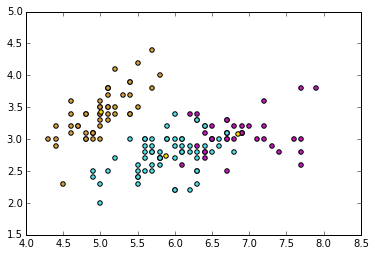

array([[ 6.1,  2.8,  4.7,  1.2],
       [ 6. ,  2.9,  4.5,  1.5],
       [ 5. ,  3.3,  1.4,  0.2]])

In [19]:
iris = load_iris()
data=iris.data
mykmeans(data,maxClusterNumbers=3,kmtype="plane")  

In [ ]:
iris = load_iris()
data=iris.data
mykmeans(data,maxClusterNumbers=3,kmtype="plane")  